# Monte Carlo Markov Chain

# Sample from a bivariate normal distribution

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats

In [2]:
# parameters
muX = 78.8
sigX = 3.668
muY = 211
sigY = 26.904
rho = 0.81
n=10000

In [3]:
def logp(x):
    if x < 0:
        return 0
    else :
        return np.log(x)

In [4]:
# Gibbs sampler 
XgY = np.empty(n)
YgX = np.empty(n)
# initialize 
XgY[0] = muX

for i in range(1,n):
    # update 
    x = XgY[i-1]
    # sample 
    YgX[i] = np.random.normal(muY + (sigY/sigX) * rho * (x - muX), np.sqrt((1 - rho**2)*sigY**2))
    # update 
    y = YgX[i]
    # sample
    XgY[i] = np.random.normal(muX + (sigX/sigY) * rho * (y - muY), np.sqrt((1 - rho**2)*sigX**2))

In [5]:
acc_rate = (len(np.unique(XgY)) / len(XgY)) * 100
print(f'Acceptance rate = {acc_rate:.0f}%')

Acceptance rate = 100%


In [6]:
# Metropolis-Hastings 
XgYMH = np.empty(n)
YgXMH = np.empty(n)
# initialize 
XgYMH[0] = muX
YgXMH[0] = muY
# iterate 
for i in range(1,n): 
    # 1. Generate random candidate
    xgy = np.random.normal(XgYMH[i-1], 5)
    ygx = np.random.normal(YgXMH[i-1], 30)

    # 2. Calculate acceptance probability 
    num = stats.multivariate_normal.pdf(np.array([xgy, ygx]), np.array([muX, muY]), np.array([[sigX**2, rho*sigX*sigY],[rho*sigX*sigY, sigY**2]]))
    denom = stats.multivariate_normal.pdf(np.array([XgYMH[i-1], YgXMH[i-1]]), np.array([muX, muY]), np.array([[sigX**2, rho*sigX*sigY],[rho*sigX*sigY, sigY**2]]))
    A = np.min([np.log(1), logp(num/denom)])

    # 3. Accept or reject 
    u = np.log(np.random.uniform(low=0, high=1))
    if u <= A: # accept 
        YgXMH[i] = ygx
        XgYMH[i] = xgy    
    else : # reject 
        YgXMH[i] = YgXMH[i-1]
        XgYMH[i] = XgYMH[i-1]

In [7]:
acc_rate = (len(np.unique(YgXMH)) / len(YgXMH)) * 100
print(f'Acceptance rate = {acc_rate:.0f}%')

Acceptance rate = 33%


Marginal distributions 

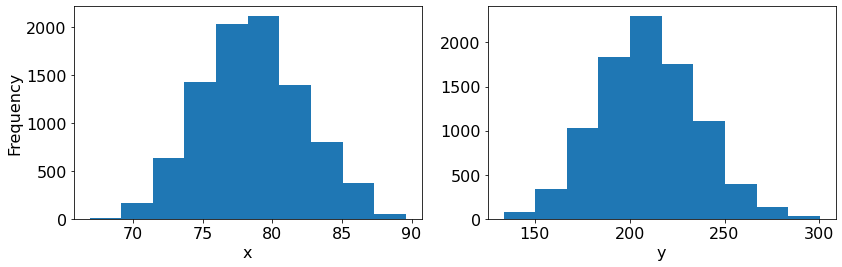

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(XgYMH[1000:]) # 1000 burn in 
plt.xlabel('x')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(YgXMH[1000:]) #
plt.xlabel('y')

plt.tight_layout()
plt.show()

Joint distribution

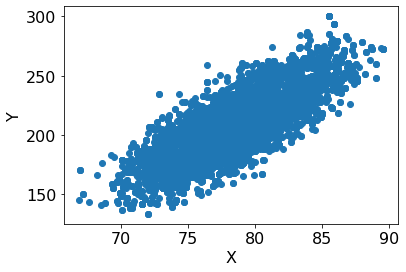

In [9]:
plt.figure()
plt.scatter(XgYMH[1000:], YgXMH[1000:])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Numpy sampler

In [10]:
test = np.random.multivariate_normal(np.array([muX, muY]), np.array([[sigX**2, rho*sigX*sigY],[rho*sigX*sigY, sigY**2]]), size=(n,))

Numpy v Gibbs v Metropolis-Hastings

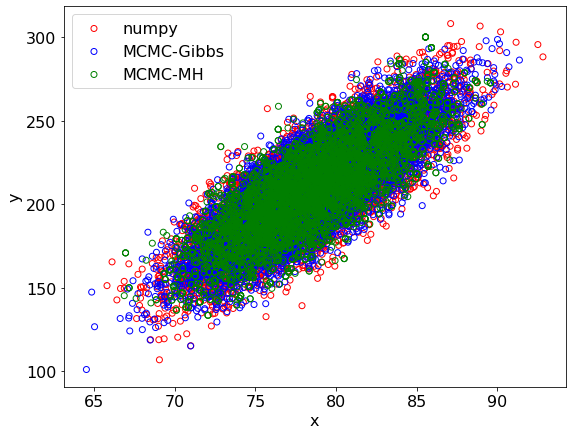

In [11]:
# numpy v gibbs v mh 
plt.figure(figsize=(9,7))
plt.scatter(test[:,0], test[:,1], facecolors='none', edgecolor='r', label='numpy')
plt.scatter(XgY[1000:], YgX[1000:], facecolors='none', edgecolor='b', label='MCMC-Gibbs')
plt.scatter(XgYMH[1000:], YgXMH[1000:], facecolors='none', edgecolor='g', label='MCMC-MH')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=0)
plt.show()

It seems like Gibbs is most like numpy method and MH sampling is much more constrained. This makes sense given the acceptance rule for MH and not Gibbs. 